In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import os
from sklearn.linear_model import LinearRegression

#       Data science course final project on topic: "What make us sick" 
                                             by Teodor Stefanov

Initial question of this project was : What makes us sick?. And the more general one: How does the environment we live in influence our health? In the quest to explore the given data and some other sources the thinking behind the following lines of code and analyses changed. 
The first idea was to make a 60 year span exploration for the Balkan penisuila but for different reasons the scope is only from 1990 -2010. Maybe on later date as I am intrested what will data shows for the years before and after the iron curtain fell.
But the main thesis of this work will be : We are human so nature make us sick and our weaknesses,but our actions either protect or make us more vulnerable. 
In the exploration the following countries will be used: Serbia,Turkey,Macedonia,Romania,Greece and Bulgaria.So now lets start with data and see where it lead us.

In [3]:
# a simple method will help us save some code and make our work faster and clear,here we will load the dataframe and make
# make the order and cleaning choosen for our research.also our small merge function is here too.
def df_load_and_clear(dataframe ,string):
    df=dataframe.rename(columns={'value':dataframe.columns[0],dataframe.columns[0]:'country'})
    df=pd.melt(df,id_vars=['country'],var_name='year', value_name=name[:len(name)])
    df1=df[(df['country'].str.contains("Turkey"))
        | (df['country'].str.contains("Serbia") == True)
        | (df['country'].str.contains("Bulgaria") == True)
        | (df['country'].str.contains("Greece") == True)
        | (df['country'].str.contains("Turkey") == True)
        | (df['country'].str.contains("Macedonia") == True)
        | (df['country'].str.contains("Romania") == True)]
    df1 =df1.loc[~df1['country'].isin(['Serbia excluding Kosovo','Serbia and Montenegro'])]
    df1['year'] =df1['year'].astype('int64',errors='ignore')
    df1[df1.columns[2]]=df1[df1.columns[2]].astype('float',errors='ignore').round(2)
    df1=df1.drop(df1[df1.year <1995].index)
    df1=df1.drop(df1[df1.year >2010].index)
    return df1
def merge_data_country(dataframe, dataframe2):
    result=pd.merge(dataframe,dataframe2, on=['country','year'])
    return result

In [4]:
# lets load some data now we will load it will be a total of 5 datasets
# gdp_per_capita,life_expectancy_at_birth,under_five_mortality,urban_population,total_health_expendure
name=os.path.splitext('gdp_per_capita.xlsx')[0]
df=(pd.read_excel("exam/gdp_per_capita.xlsx",na_values=0))
gdp= df_load_and_clear(df,name)

In [5]:
name=os.path.splitext('life_expectancy_at_birth')[0]
df=(pd.read_excel("exam/life_expectancy_at_birth.xlsx",na_values=0))
lifeatbirth= df_load_and_clear(df,name)

In [6]:
name=os.path.splitext('under_five_mortality_rate')[0]
df=(pd.read_excel("exam/under_five_mortality_rate.xlsx",na_values=0))
under_five_mortality= df_load_and_clear(df,name)

In [7]:
name=os.path.splitext('urban_population_pct')[0]
df=(pd.read_excel("exam/urban_population_pct.xlsx",na_values=0))
urban_population= df_load_and_clear(df,name)

In [8]:
name=os.path.splitext('total_health_expenditure_gdp_pct')[0]
df=(pd.read_excel("exam/total_health_expenditure_gdp_pct.xlsx",na_values=0))
total_health_expenditure=df_load_and_clear(df,name)

Now we loaded our data,it is time to merge it in one dataframe and do some exploration,and finaly we have our data.

In [9]:
overall_table= merge_data_country(gdp,total_health_expenditure)
overall_table=merge_data_country(overall_table,urban_population)
overall_table=merge_data_country(overall_table,under_five_mortality)
overall_table=merge_data_country(overall_table,lifeatbirth)
#overall_table['gdp_per_capita'] =overall_table['gdp_per_capita'].apply(lambda x: x/100).astype(np.int)
overall_table['gdp_per_capita']=overall_table['gdp_per_capita'].astype(np.int)
overall_table.reset_index(drop=True)

,country,year,gdp_per_capita,total_health_expenditure_gdp_pct,urban_population_pct,under_five_mortality_rate,life_expectancy_at_birth
0,Bulgaria,1995,8479,5.23,67.78,22.9,71.0
1,Greece,1995,21426,8.59,59.29,10.1,77.8
2,"Macedonia, FYR",1995,7700,8.52,59.72,24.5,71.8
3,Romania,1995,10516,3.49,53.77,32.2,69.4
4,Serbia,1995,7167,7.32,51.75,19.0,72.0
5,Turkey,1995,11530,2.51,62.12,52.7,70.0
6,Bulgaria,1996,8659,4.67,68.01,22.7,70.9
7,Greece,1996,21905,8.55,59.38,9.7,77.9
8,"Macedonia, FYR",1996,7759,8.75,59.65,22.4,72.1
9,Romania,1996,10969,3.67,53.62,31.2,69.1


{'boxes': [<matplotlib.lines.Line2D at 0x68c5048>],
 'caps': [<matplotlib.lines.Line2D at 0x68c5a58>,
 'fliers': [<matplotlib.lines.Line2D at 0x68d0710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x68d02e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x68c5198>,
  <matplotlib.lines.Line2D at 0x68c5630>]}

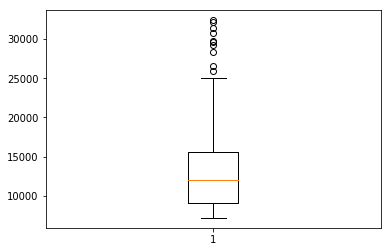

In [16]:
overall_table.gdp_per_capita.describe()
plt.boxplot(overall_table.gdp_per_capita)

In [17]:
#so now we have our table time to start do some things with it let start with Bulgaria
Bg=overall_table.groupby("country").get_group("Bulgaria")
Srb=overall_table.groupby("country").get_group("Serbia")
Rom=overall_table.groupby("country").get_group("Romania")
Mac=overall_table.groupby("country").get_group("Macedonia, FYR")
Tr=overall_table.groupby("country").get_group("Turkey")

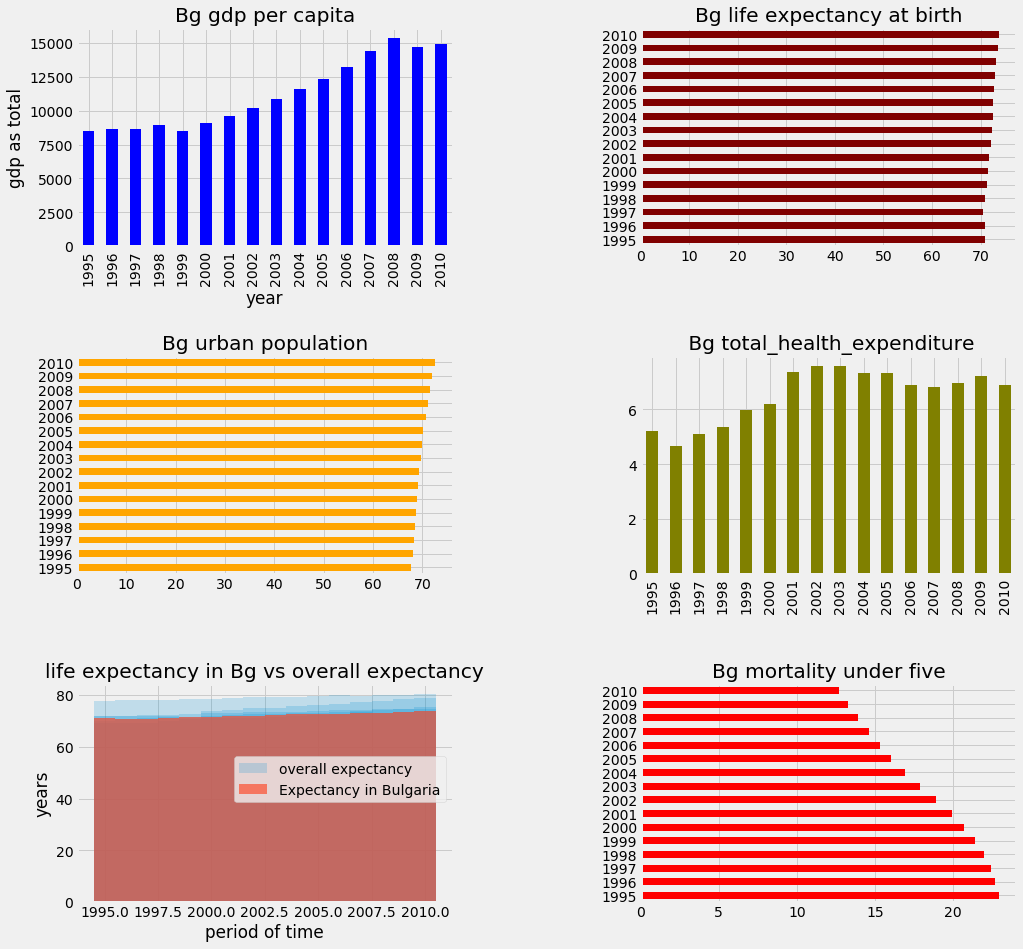

In [18]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(15,15))
ax1=plt.subplot2grid((6,2),(0,0), rowspan=2,colspan=1)
ax2=plt.subplot2grid((6,2),(0,1), rowspan=2,colspan=1)
ax3=plt.subplot2grid((6,2),(2,0), rowspan=2,colspan=1)
ax4=plt.subplot2grid((6,2),(2,1), rowspan=2,colspan=1)
ax5=plt.subplot2grid((6,2),(4,1), rowspan=2,colspan=1)
ax6=plt.subplot2grid((6,2),(4,0), rowspan=2,colspan=1)
fig.subplots_adjust(wspace=0.5,hspace=2)

gdp=Bg.gdp_per_capita.plot.bar(ax=ax1,title='Bg gdp per capita',color='#0000FF')
gdp.set_xticklabels(Bg.year.values )
gdp.set_xlabel('year')
gdp.set_ylabel('gdp as total')

leab=Bg.life_expectancy_at_birth.plot(kind='barh',ax=ax2,title='Bg life expectancy at birth',color='#800000')
leab.set_yticklabels(Bg.year.values)


ub=Bg.urban_population_pct.plot(kind='barh',ax=ax3,title='Bg urban population',color='#FFA500')
ub.set_yticklabels(Bg.year.values )

the=Bg.total_health_expenditure_gdp_pct.plot(kind='bar',ax=ax4,title=' Bg total_health_expenditure',color='#808000')
the.set_xticklabels(Bg.year.values )

fmr=Bg.under_five_mortality_rate.plot(kind='barh',ax=ax5,title='Bg mortality under five',color='#FF0000')
fmr.set_yticklabels(Bg.year.values )


plt.bar(overall_table.year,overall_table.life_expectancy_at_birth,alpha=0.2,width=1.0,label='overall expectancy')
plt.bar(Bg.year.astype(np.int),Bg.life_expectancy_at_birth,alpha=0.7,width=1.0,label='Expectancy in Bulgaria')
plt.title('life expectancy in Bg vs overall expectancy')
plt.ylabel('years')
plt.xlabel('period of time')
leg=plt.legend(bbox_to_anchor=(1.00,0.7), loc=1)

plt.show()

So what we can see from our small sample data are few things and few dependecies for sure:

Higher gdp and wealther country and citizens means better health care,but it does not mean longer life.

Also more money for health care means better survavibility of the infants.

But better health care and wealthier citizens dont mean bigger population or longer life.In the big picture. Our better living can help us be healthier but does not change significantly the outlook of the country.

And yeah we can add few months or years to our lives if we care better for ourselves, or it is just plain luck and just a coincidence when the bell will ring for us.

-0.718 0.596 0.762


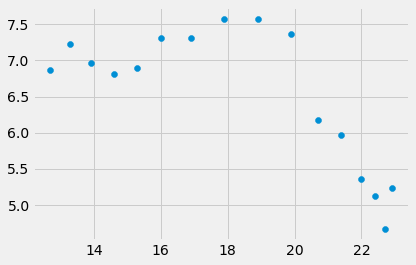

In [19]:
aBg=Bg.under_five_mortality_rate.corr(Bg.total_health_expenditure_gdp_pct).round(3)
bBg=Bg.gdp_per_capita.corr(Bg.total_health_expenditure_gdp_pct).round(3)
cBg=Bg.total_health_expenditure_gdp_pct.corr(Bg.life_expectancy_at_birth).round(3)
print(aBg,bBg,cBg)
plt.scatter(Bg.under_five_mortality_rate,Bg.total_health_expenditure_gdp_pct)

So basicly our stated trends appear to be true. A show us the connection betweeen under 5 mortality and healh expenditure and it is pretty high and even with - symbol. B is showing us that wealther country means healthier citizens. And c show us the connection between health care and life expectancy. Yes in the bigger picture we cant see big difference in life expectancy but still maybe if you take care for yourself you get few months and years more,before the bells ring for you.

Well we have our one case.Let see if the trends are similiar for other Balkan countries.Lets go with Serbia next and Turkey

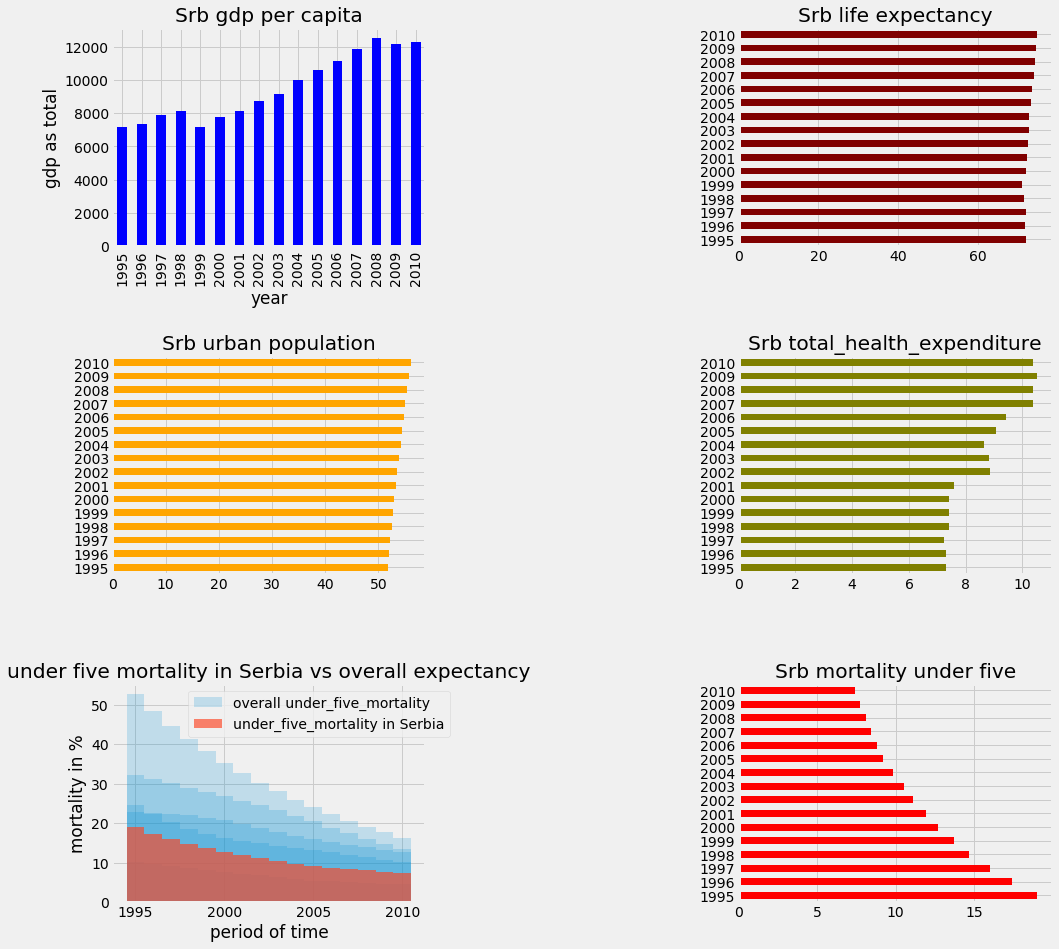

In [20]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(15,15))
ax1=plt.subplot2grid((6,2),(0,0), rowspan=2,colspan=1)
ax2=plt.subplot2grid((6,2),(0,1), rowspan=2,colspan=1)
ax3=plt.subplot2grid((6,2),(2,0), rowspan=2,colspan=1)
ax4=plt.subplot2grid((6,2),(2,1), rowspan=2,colspan=1)
ax5=plt.subplot2grid((6,2),(4,1), rowspan=2,colspan=1)
ax6=plt.subplot2grid((6,2),(4,0), rowspan=2,colspan=1)
fig.subplots_adjust(wspace=1,hspace=2)

gdp=Srb.gdp_per_capita.plot.bar(ax=ax1,title='Srb gdp per capita',color='#0000FF')
gdp.set_xticklabels(Srb.year.values )
gdp.set_xlabel('year')
gdp.set_ylabel('gdp as total')

leab=Srb.life_expectancy_at_birth.plot(kind='barh',ax=ax2,title='Srb life expectancy',color='#800000')
leab.set_yticklabels(Srb.year.values)

ub=Srb.urban_population_pct.plot(kind='barh',ax=ax3,title='Srb urban population',color='#FFA500')
ub.set_yticklabels(Srb.year.values )

the=Srb.total_health_expenditure_gdp_pct.plot(kind='barh',ax=ax4,title='Srb total_health_expenditure',color='#808000')
the.set_yticklabels(Srb.year.values )

fmr=Srb.under_five_mortality_rate.plot(kind='barh',ax=ax5,title='Srb mortality under five',color='#FF0000')
fmr.set_yticklabels(Srb.year.values )


plt.bar(overall_table.year,overall_table.under_five_mortality_rate,alpha=0.2,width=1.0,label='overall under_five_mortality')
plt.bar(Srb.year,Srb.under_five_mortality_rate,alpha=0.7,width=1.0,label='under_five_mortality in Serbia')
plt.title('under five mortality in Serbia vs overall expectancy')
plt.ylabel('mortality in %')
plt.xlabel('period of time')
leg=plt.legend(bbox_to_anchor=(1.1, 1), loc=1)

plt.show()

In [21]:
aSrb=Srb.under_five_mortality_rate.corr(Srb.total_health_expenditure_gdp_pct).round(3)
bSrb=Srb.gdp_per_capita.corr(Srb.total_health_expenditure_gdp_pct).round(3)
cSrb=Srb.total_health_expenditure_gdp_pct.corr(Srb.life_expectancy_at_birth).round(3)
print(aSrb,bSrb,cSrb)

-0.885 0.97 0.945


So as we can see, the trends we noticed are even more favorable here.And there is one major difference.Even if overall we can say Serbia people are a bit poorer with the bigger percent of gdp for health,it results in better survavibility of ther newborns and younger generation. And again we notice that even if there is slight dependence between our observed features in general city population and longevity are changing slightly compared to the investment in health.
And please have mercy,I really tried hard to make ploting a function but yeah python do python things so there will be some blocks of code at certain places.

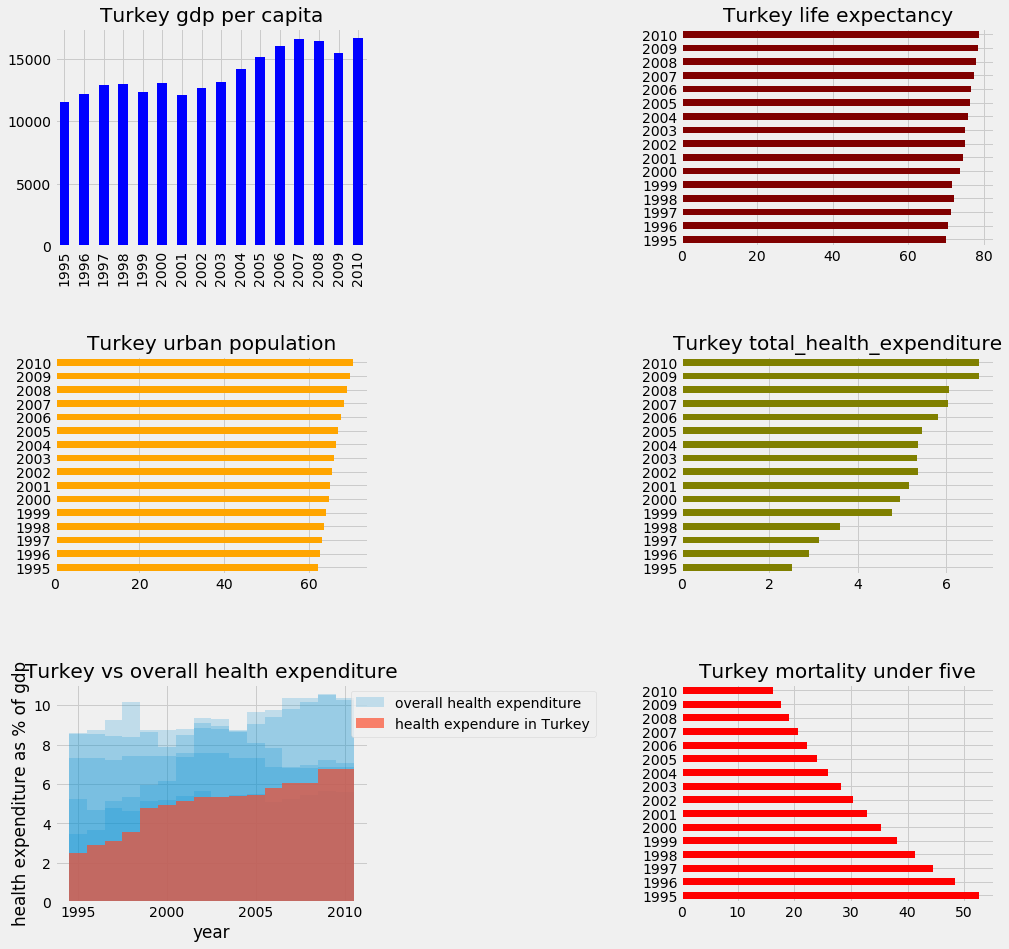

In [22]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(15,15))
ax1=plt.subplot2grid((6,2),(0,0), rowspan=2,colspan=1)
ax2=plt.subplot2grid((6,2),(0,1), rowspan=2,colspan=1)
ax3=plt.subplot2grid((6,2),(2,0), rowspan=2,colspan=1)
ax4=plt.subplot2grid((6,2),(2,1), rowspan=2,colspan=1)
ax5=plt.subplot2grid((6,2),(4,1), rowspan=2,colspan=1)
ax6=plt.subplot2grid((6,2),(4,0), rowspan=2,colspan=1)
ax1.tick_params(which = 'both', direction = 'out')
ax2.tick_params(which = 'both', direction = 'out')
ax3.tick_params(which = 'both', direction = 'out')
ax4.tick_params(which = 'both', direction = 'out')
ax5.tick_params(which = 'both', direction = 'out')
ax6.tick_params(which = 'both', direction = 'out')


fig.subplots_adjust(wspace=1,hspace=2)

gdp=Tr.gdp_per_capita.plot.bar(ax=ax1,title='Turkey gdp per capita',color='#0000FF')
gdp.set_xticklabels(Tr.year.values )

leab=Tr.life_expectancy_at_birth.plot(kind='barh',ax=ax2,title='Turkey life expectancy',color='#800000')
leab.set_yticklabels(Tr.year.values)

ub=Tr.urban_population_pct.plot(kind='barh',ax=ax3,title='Turkey urban population',color='#FFA500')
ub.set_yticklabels(Tr.year.values )

the=Tr.total_health_expenditure_gdp_pct.plot(kind='barh',ax=ax4,title='Turkey total_health_expenditure',color='#808000')
the.set_yticklabels(Tr.year.values )

fmr=Tr.under_five_mortality_rate.plot(kind='barh',ax=ax5,title='Turkey mortality under five',color='#FF0000')
fmr.set_yticklabels(Tr.year.values )



plt.bar(overall_table.year,overall_table.total_health_expenditure_gdp_pct,alpha=0.2,width=1.0,label='overall health expenditure')
plt.bar(Tr.year,Tr.total_health_expenditure_gdp_pct,alpha=0.7,width=1.0,label='health expendure in Turkey')
plt.title('Turkey vs overall health expenditure')
plt.xlabel('year')
plt.ylabel('health expenditure as % of gdp')
leg=plt.legend(bbox_to_anchor=(1.75, 1), loc=1)

plt.show()

-0.975 0.777 0.955


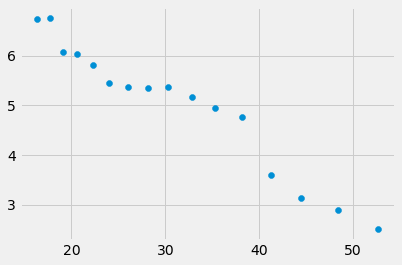

In [24]:
aTr=Tr.under_five_mortality_rate.corr(Tr.total_health_expenditure_gdp_pct).round(3)
bTr=Tr.gdp_per_capita.corr(Tr.total_health_expenditure_gdp_pct).round(3)
cTr=Tr.total_health_expenditure_gdp_pct.corr(Tr.life_expectancy_at_birth).round(3)
print(aTr,bTr,cTr)
plt.scatter(Tr.under_five_mortality_rate,Tr.total_health_expenditure_gdp_pct)

We saw the corellations for the 3 examples we got from the data. But lets try it at our dataframa overall.

In [43]:
overall=overall_table.under_five_mortality_rate.corr(overall_table.total_health_expenditure_gdp_pct).round(3)
overall2=overall_table.gdp_per_capita.corr(overall_table.total_health_expenditure_gdp_pct).round(3)
overall3=overall_table.total_health_expenditure_gdp_pct.corr(overall_table.life_expectancy_at_birth).round(3)
print(overall,overall2,overall3)

-0.834 0.323 0.537


So we see the basic trends they are less obvious on the whole data but main dependancies are still correct.Now maybe it is time to go for the second part how the food and drinking habits affect the overall health status.
We saw that it is better to live in more developed country which is taking care for its citizens.But we also saw that better life does not mean necesarily longer life or bigger population. More probably this lead to the serious problem faced right now from developed countries with their populations getting older as a trend.

In [25]:
# so we are going for the second part of the course work but we need to slightly modify the reading function 
# also you will notice on some of the files we need to reset the indexes but yeah we do it when it is needed
# the final goal is again to get a table like the first one and we will do some other things on it too.
def df_load_and_clear_modified(dataframe,string):
    df=dataframe.rename(columns={dataframe.columns[0]:'country'})
    df=pd.melt(df,id_vars=['country'],var_name='year', value_name=name[:len(name)])
    df1=df[(df['country'].str.contains("Turkey"))
        | (df['country'].str.contains("Serbia") == True)
        | (df['country'].str.contains("Bulgaria") == True)
        | (df['country'].str.contains("Greece") == True)
        | (df['country'].str.contains("Turkey") == True)
        | (df['country'].str.contains("Macedonia") == True)
        | (df['country'].str.contains("Romania") == True)]
    df1 =df1.loc[~df1['country'].isin(['Serbia excluding Kosovo','Serbia and Montenegro'])]
    df1['year'] =df1['year'].astype('int64',errors='ignore')
    df1=df1.drop(df1[df1.year <1995].index)
    df1=df1.drop(df1[df1.year >2010].index)
    return df1
def merge_data_food(dataframe, dataframe2):
    result=pd.merge(dataframe,dataframe2, on=['country','year'])
    return result

In [26]:
name=os.path.splitext('food_consumption')[0]
fd=(pd.read_excel("exam/food_consumption.xlsx",na_values=0))
fd.reset_index(level=0,inplace=True)
food=df_load_and_clear_modified(fd,name)

In [27]:
name=os.path.splitext('bmi_female')[0]
fbmi=(pd.read_excel("exam/bmi_female.xlsx",na_values=0))
fbfmd=df_load_and_clear_modified(fbmi,name)

In [28]:
name=os.path.splitext('bmi_male')[0]
fbm=(pd.read_excel("exam/bmi_male.xlsx",na_values=0))
fbmd=df_load_and_clear_modified(fbm,name)

In [29]:
name=os.path.splitext('sugar_consumption')[0]
sugar=(pd.read_excel("exam/sugar_consumption.xlsx",na_values=0))
sugar.reset_index(level=0,inplace=True)
sugd=df_load_and_clear_modified(sugar,name)

In [30]:
name=os.path.splitext('cholesterol_female')[0]
sugar=(pd.read_excel("exam/cholesterol_female.xlsx",na_values=0))
#sugar.reset_index(level=0,inplace=True)
chfmd=df_load_and_clear_modified(sugar,name)

In [31]:
name=os.path.splitext('cholesterol_male')[0]
sugar=(pd.read_excel("exam/cholesterol_male.xlsx",na_values=0))
#sugar.reset_index(level=0,inplace=True)
chmd=df_load_and_clear_modified(sugar,name)

In [32]:
overall_table_food=merge_data_food(food,fbfmd)
overall_table_food=merge_data_food(overall_table_food,fbmd)
overall_table_food=merge_data_food(overall_table_food,sugd)
overall_table_food=merge_data_food(overall_table_food,chfmd)
overall_table_food=merge_data_food(overall_table_food,chmd)
overall_table_food.reset_index(drop=True)

,country,year,food_consumption,bmi_female,bmi_male,sugar_consumption,cholesterol_female,cholesterol_male
0,Bulgaria,1995,2898.82,25.35880,25.78474,82.19,5.236230,5.187304
1,Greece,1995,3507.69,24.50314,25.38483,87.67,5.131718,5.183166
2,"Macedonia, FYR",1995,2580.51,25.06356,25.51704,93.15,5.071815,4.994047
3,Romania,1995,3065.07,24.95871,24.62790,68.49,5.129663,5.082006
4,Serbia,1995,NaN,25.59045,25.90583,NaN,5.004095,4.930759
5,Turkey,1995,3551.96,27.44774,25.14651,76.71,4.917528,4.790612
6,Bulgaria,1996,2742.69,25.29274,25.77704,76.71,5.211169,5.163681
7,Greece,1996,3511.75,24.53248,25.43099,84.93,5.101518,5.158924
8,"Macedonia, FYR",1996,2574.49,25.04531,25.53988,95.89,5.047634,4.967134
9,Romania,1996,3092.82,24.93579,24.63848,73.97,5.107653,5.062301


In [33]:
overall_table_food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 8 columns):
country               60 non-null object
year                  60 non-null int64
food_consumption      50 non-null float64
bmi_female            60 non-null float64
bmi_male              60 non-null float64
sugar_consumption     50 non-null float64
cholesterol_female    60 non-null float64
cholesterol_male      60 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.2+ KB


So at first glance what we see Serbia has a lot of missing data,that is not good.The options either to fill it or just dismiss Serbia. Ok what should we do if we fill it it is pure guess and some mathematical asumptions.Or maybe just leave it as if we drop Serbia here we should drop it in our first table at the start of the document too.So we will just keep in mind that Serbia is not good for comparison.And maybe its NaN may have some effect over some assumptions but not that great effect at all.
Also for the analysis it will be better if we combine some of the columns 2x2. We dont need bmi and cholesterol for male and women separately.

In [34]:
overall_table_food['body_mass_index']=overall_table_food['bmi_female']+overall_table_food['bmi_male']
overall_table_food['cholesterol']=overall_table_food['cholesterol_female']+overall_table_food['cholesterol_male']
overall_table_food.cholesterol= overall_table_food.cholesterol.apply(lambda cholesterol: cholesterol/2)
overall_table_food.body_mass_index= overall_table_food.body_mass_index.apply(lambda body_mass_index:body_mass_index/2)
overall_cleaned_food=overall_table_food.drop(overall_table_food.columns[[3,4,6,7]], axis=1)
overall_cleaned_food

,country,year,food_consumption,sugar_consumption,body_mass_index,cholesterol
0,Bulgaria,1995,2898.82,82.19,25.571770,5.211767
1,Greece,1995,3507.69,87.67,24.943985,5.157442
2,"Macedonia, FYR",1995,2580.51,93.15,25.290300,5.032931
3,Romania,1995,3065.07,68.49,24.793305,5.105835
4,Serbia,1995,NaN,NaN,25.748140,4.967427
5,Turkey,1995,3551.96,76.71,26.297125,4.854070
6,Bulgaria,1996,2742.69,76.71,25.534890,5.187425
7,Greece,1996,3511.75,84.93,24.981735,5.130221
8,"Macedonia, FYR",1996,2574.49,95.89,25.292595,5.007384
9,Romania,1996,3092.82,73.97,24.787135,5.084977


In [35]:
overall_cleaned_food.describe()

,year,food_consumption,sugar_consumption,body_mass_index,cholesterol
count,60.00000,50.000000,50.000000,60.000000,60.000000
mean,1999.50000,3171.813200,81.422800,25.570644,4.985924
std,2.89652,358.759866,12.660037,0.606966,0.105491
min,1995.00000,2574.490000,57.530000,24.764340,4.776819
25%,1997.00000,2817.050000,73.970000,25.149929,4.919596
50%,1999.50000,3145.990000,79.450000,25.506435,4.975540
75%,2002.00000,3481.735000,89.725000,25.742887,5.063010
max,2004.00000,3712.850000,120.550000,27.078975,5.211767


So as we see Serbia is not good for anything but we can explore some of the other countries.Lets try with the 4 below.

In [36]:
Trf=overall_cleaned_food.groupby("country").get_group("Turkey")
Bgf=overall_cleaned_food.groupby("country").get_group("Bulgaria")
Grf=overall_cleaned_food.groupby("country").get_group("Greece")
Rf=overall_cleaned_food.groupby("country").get_group("Romania")

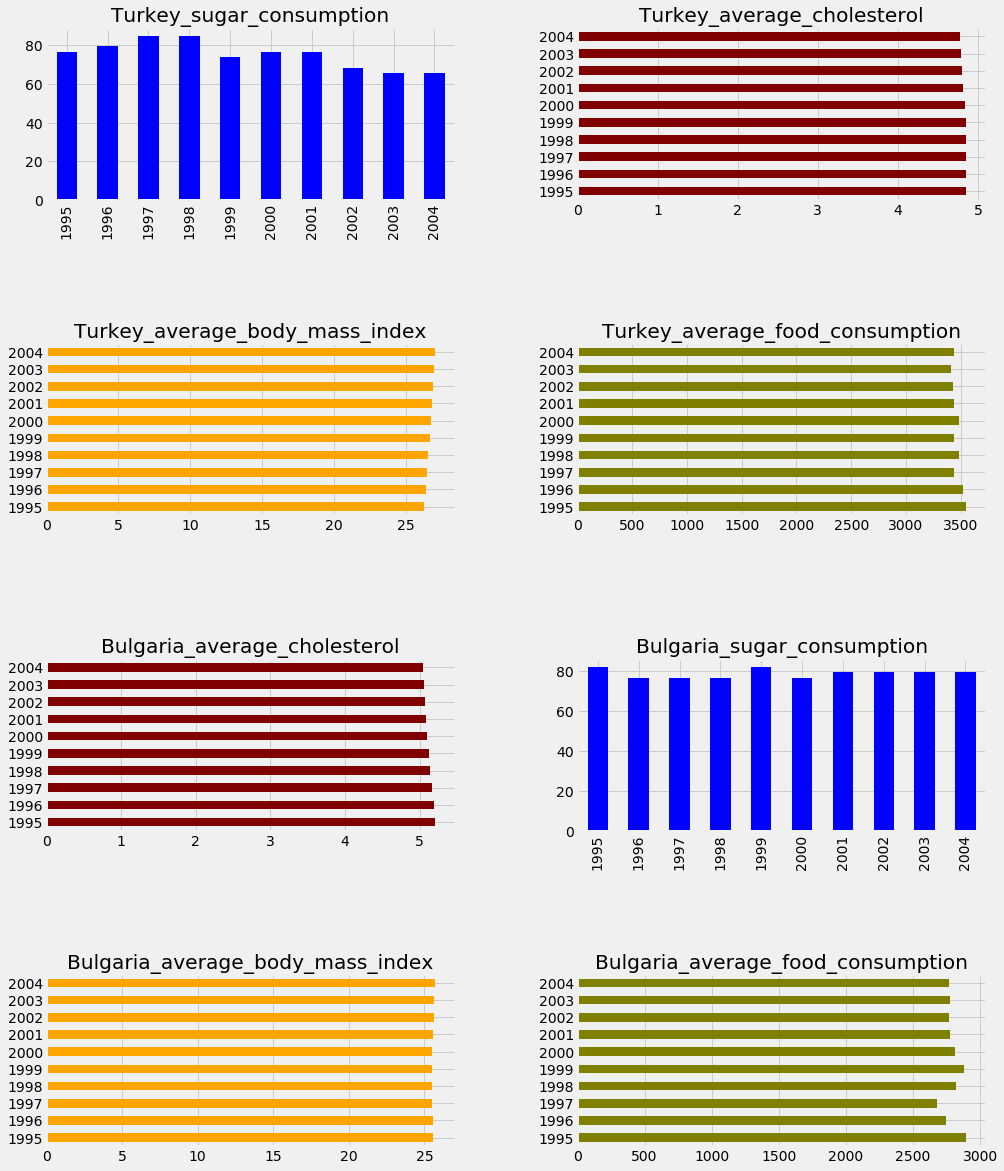

In [39]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(15,30))
ax1=plt.subplot2grid((12,2),(0,0), rowspan=2,colspan=1)
ax2=plt.subplot2grid((12,2),(0,1), rowspan=2,colspan=1)
ax3=plt.subplot2grid((12,2),(2,0), rowspan=2,colspan=1)
ax4=plt.subplot2grid((12,2),(2,1), rowspan=2,colspan=1)
ax5=plt.subplot2grid((12,2),(4,1), rowspan=2,colspan=1)
ax6=plt.subplot2grid((12,2),(4,0), rowspan=2,colspan=1)
ax7=plt.subplot2grid((12,2),(6,0), rowspan=2,colspan=1)
ax8=plt.subplot2grid((12,2),(6,1), rowspan=2,colspan=1)
fig.subplots_adjust(wspace=0.3,hspace=10)

sugtr=Trf.sugar_consumption.plot.bar(ax=ax1,title='Turkey_sugar_consumption',color='#0000FF')
sugtr.set_xticklabels(Trf.year.values )

trch=Trf.cholesterol.plot(kind='barh',ax=ax2,title='Turkey_average_cholesterol',color='#800000')
trch.set_yticklabels(Trf.year.values)

bmTr=Trf.body_mass_index.plot(kind='barh',ax=ax3,title='Turkey_average_body_mass_index',color='#FFA500')
bmTr.set_yticklabels(Trf.year.values )

the=Trf.food_consumption.plot(kind='barh',ax=ax4,title='Turkey_average_food_consumption',color='#808000')
the.set_yticklabels(Trf.year.values )
## second country is codded here
sugBg=Bgf.sugar_consumption.plot.bar(ax=ax5,title='Bulgaria_sugar_consumption',color='#0000FF')
sugBg.set_xticklabels(Bgf.year.values )

bgch=Bgf.cholesterol.plot(kind='barh',ax=ax6,title='Bulgaria_average_cholesterol',color='#800000')
bgch.set_yticklabels(Bgf.year.values)

bmBg=Bgf.body_mass_index.plot(kind='barh',ax=ax7,title='Bulgaria_average_body_mass_index',color='#FFA500')
bmBg.set_yticklabels(Bgf.year.values )

Bgfc=Bgf.food_consumption.plot(kind='barh',ax=ax8,title='Bulgaria_average_food_consumption',color='#808000')
Bgfc.set_yticklabels(Bgf.year.values )
plt.show()

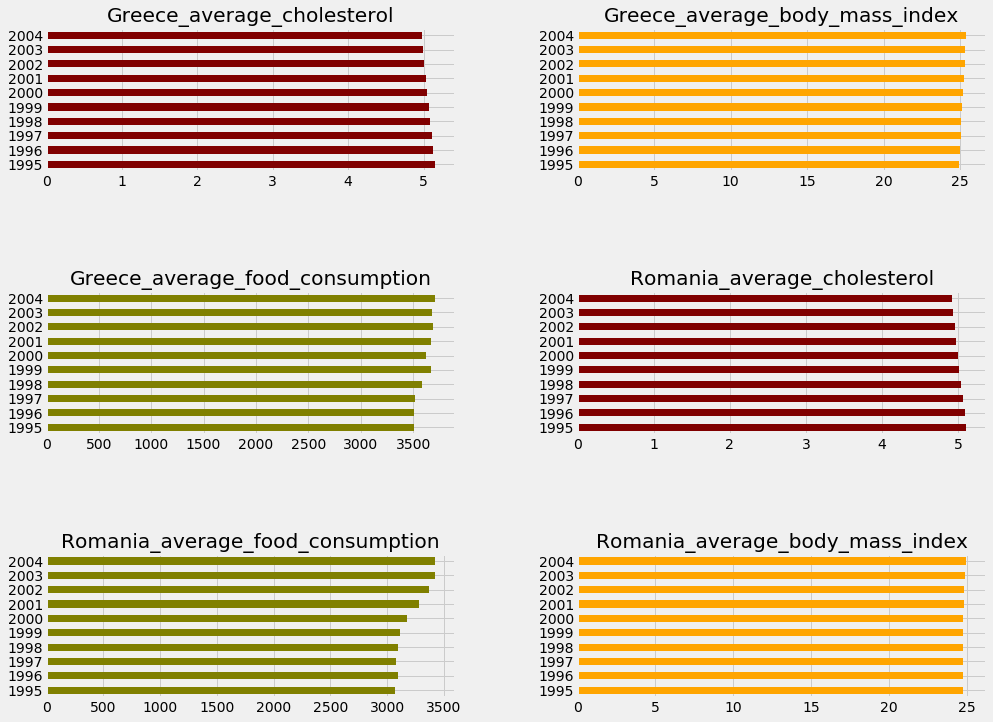

In [41]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(15,25))
ax1=plt.subplot2grid((12,2),(0,0), rowspan=2,colspan=1)
ax2=plt.subplot2grid((12,2),(0,1), rowspan=2,colspan=1)
ax3=plt.subplot2grid((12,2),(2,0), rowspan=2,colspan=1)
ax4=plt.subplot2grid((12,2),(2,1), rowspan=2,colspan=1)
ax5=plt.subplot2grid((12,2),(4,1), rowspan=2,colspan=1)
ax6=plt.subplot2grid((12,2),(4,0), rowspan=2,colspan=1)
fig.subplots_adjust(wspace=0.3,hspace=10)

Grch=Grf.cholesterol.plot(kind='barh',ax=ax1,title='Greece_average_cholesterol',color='#800000')
Grch.set_yticklabels(Grf.year.values)

bmGrf=Grf.body_mass_index.plot(kind='barh',ax=ax2,title='Greece_average_body_mass_index',color='#FFA500')
bmGrf.set_yticklabels(Grf.year.values )

Grhe=Grf.food_consumption.plot(kind='barh',ax=ax3,title='Greece_average_food_consumption',color='#808000')
Grhe.set_yticklabels(Grf.year.values )
## second country is codded here

Rfch=Rf.cholesterol.plot(kind='barh',ax=ax4,title='Romania_average_cholesterol',color='#800000')
Rfch.set_yticklabels(Rf.year.values)

bmRf=Rf.body_mass_index.plot(kind='barh',ax=ax5,title='Romania_average_body_mass_index',color='#FFA500')
bmRf.set_yticklabels(Rf.year.values )

Rffc=Rf.food_consumption.plot(kind='barh',ax=ax6,title='Romania_average_food_consumption',color='#808000')
Rffc.set_yticklabels(Rf.year.values )
plt.show()

Oh,what a surprise. As we can see Greece and Romania have the highest average food consumption as calories values but the lowest Bmi index.Also while Romanians intake of sugar per day is about average for the region,greeks are the undenable champions in there.
So now this appears to be the diet preachers and doctors nightmare. Or not? as we can see Turkey and Bulgaria are leading the bmi and cholesterol charts as total numbers. 
But what is striking is even if the average calorie intake is lower it seems that the quality of food is worse??!
So there is some truth in the old saying,with a wrinkle: "Eat all you want,but eat healthy".

So maybe some more charts and correlations?

In [42]:
a=Bgf.food_consumption.corr(Bgf.body_mass_index)
b=Grf.food_consumption.corr(Grf.body_mass_index)
c=Trf.food_consumption.corr(Trf.body_mass_index)
d=Rf.food_consumption.corr(Rf.body_mass_index)
print(a,b,c,d)

-0.118154279855 0.919749585406 -0.796834027881 0.906765825864


Man these correlations made thе picture even murkier but it is all cleared at least that Romanians are facing the biggest crysis right now.Their average food consumption is making the highest jump and it shows in their average bmi if it is even slower to show significantly.

In [43]:
a=Trf.food_consumption.mean()
b=Bgf.food_consumption.mean()
c=Grf.food_consumption.mean()
d=Rf.food_consumption.mean()
print(a,b,c,d)

3462.631 2792.862 3617.432 3211.5559999999996


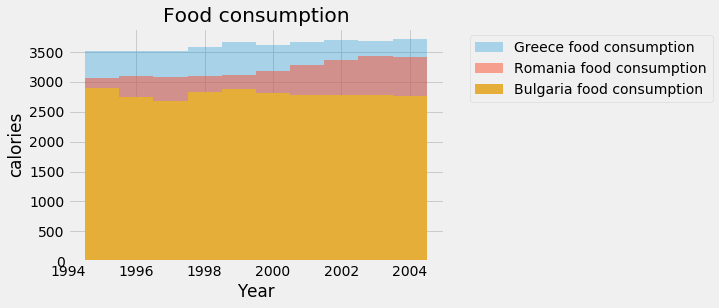

In [44]:

plt.bar(Grf.year,Grf.food_consumption,alpha=0.3,width =1,label = "Greece food consumption")
plt.bar(Rf.year,Rf.food_consumption,alpha=0.5,width =1,label = "Romania food consumption")
plt.bar(Bgf.year,Bgf.food_consumption,alpha=1,width =1,label = "Bulgaria food consumption")
plt.title("Food consumption")
plt.xlabel("Year")
plt.ylabel("calories")
plt.rcParams['figure.figsize'] = (8, 5)
leg= plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

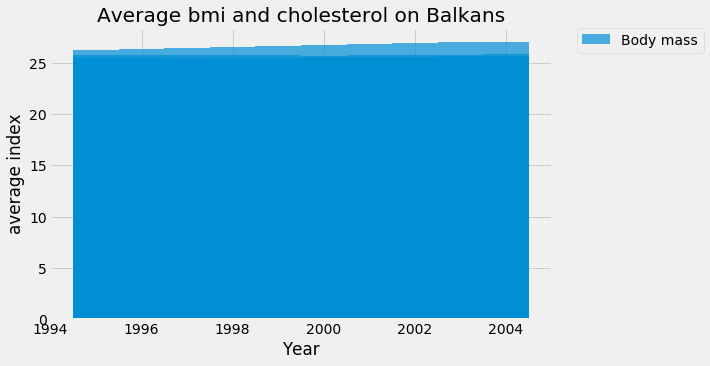

In [47]:
plt.bar(overall_cleaned_food.year,overall_cleaned_food.body_mass_index,alpha=0.7,width = 1,label = "Body mass")
##plt.bar(overall_cleaned_food.year,overall_cleaned_food.cholesterol,alpha=0.5,width =1,label = "cholesterol")
plt.title("Average bmi and cholesterol on Balkans")
plt.xlabel("Year")
plt.ylabel("average index")
plt.rcParams['figure.figsize'] = (8, 5)
leg= plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

So at end I sit on a lot of code and data and I dont know what to say.At one side it is clear that being in more developed country is good for you.But on the other is food consumption and more importantly how it spreads it seems in the different kind of food products. Overall I see some trends other I probably miss.And I feel like I made a one big mess of data and got lost.
And as for Usa data,I honestly took a look over it.It seems fun to clean it.But honestly with the scope of the used files here and the features that this Kaggle dataset offers. I didn't see the point as only 1 feature for the bmi would have been useful in the context of the things done here until now.So instead I have chosen to play some linear regression modeling.
And yes I could have made 1 big table from both but the food table has few less years and Serbia is wiht like 20 NaN values so I decided to keep them separated.

In [48]:
x_train =overall_table['gdp_per_capita'].values[:,np.newaxis]
y_train=overall_table['total_health_expenditure_gdp_pct']
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
x_test=[[30000],[27444],[23400],[18932],[25331],[16000],[15345],[12543],[11987],[10645],[9433],[8888],[7945]]
predictions=lm.predict(x_test)
print(predictions)

[ 8.64432128  8.40113827  8.01638394  7.59128938  8.20010318  7.31233298
  7.25001495  6.98342701  6.93052804  6.80284745  6.68753532  6.63568292
  6.54596399]


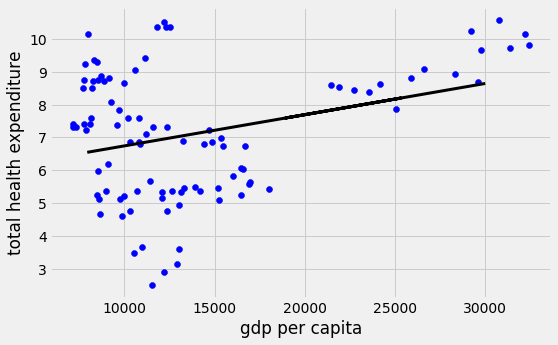

In [50]:
plt.scatter(x_train,y_train,color='b')
plt.plot(x_test,predictions,color='black',linewidth=3)
plt.xlabel('gdp per capita')
plt.ylabel('total health expenditure')
plt.show()

It is fun and actually some training gives it better spreading.Lets do it for the overall food table too!

In [70]:
## small fix on our cleaned food table so lm to be able to work
n=overall_cleaned_food.dropna(how='any')
x_train =n['food_consumption'].values[:,np.newaxis]
y_train=n['body_mass_index']
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
x_test=[[3600],[2744],[2340],[1892],[2531],[1600],[1545],[2543],[1987],[3645],[2433],[2888],[3945]]
predictions=lm.predict(x_test)
print(predictions)

[ 25.66657758  25.40218161  25.27739659  25.13902113  25.33639149
  25.04882998  25.03184192  25.34009798  25.16836414  25.68047691
  25.30612186  25.44665944  25.77313905]


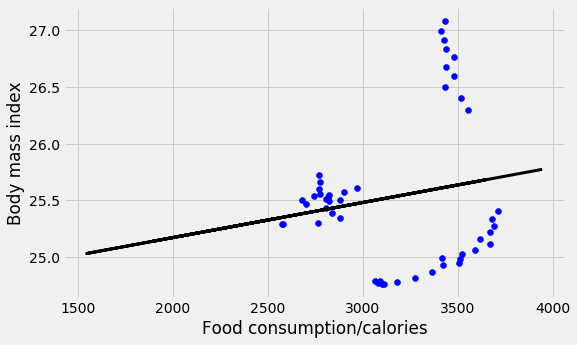

In [72]:
plt.scatter(x_train,y_train,color='b')
plt.plot(x_test,predictions,color='black',linewidth=3)
plt.xlabel('Food consumption/calories')
plt.ylabel('Body mass index')
plt.show()

Hm our first modelling was definitely better. But maybe more training will help.Anyway it seems this will be the end of this exam work.

In [53]:
## yeah i know I said the end but let see and the usa data. I can only use the bmi column from it so : lets do it.
ehrsp=pd.read_csv("exam/ehresp_2014.csv",header=None,
                  usecols=[2,3,4],names=["income_per_month","body_mass_index","changes_in_household"])

ehrsp1=ehrsp.drop([0,1])


In [54]:
ehrsp1=ehrsp1.replace(['-1'],np.nan)
ehrsp1.dropna()
ehrsp1.body_mass_index=ehrsp1.body_mass_index.astype(np.float)

In [55]:
ehrsp1.describe()
usabmi=ehrsp1.body_mass_index.mean()

In [57]:
a=overall_cleaned_food.groupby(overall_cleaned_food.year).get_group(2004)
balkansaveragebmi=a.body_mass_index.mean()

In [58]:
print(usabmi,balkansaveragebmi)

27.76601161780755 25.773584166666666


So as we can see tha last values for the balkans peninsula from 2004,are showing us that the average bmi was with 2 points less then  the bmi of usa citizens as of 2014.But as we can see 2004 is far back a whole decade so we cant really say if this difference still stands and how does it evolved through the years.